In [ ]:
!pip install  -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#upload your json api file from kaggle

In [ ]:

!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:01<00:00, 38.9MB/s]
100% 66.0M/66.0M [00:01<00:00, 56.8MB/s]


In [ ]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,Dropout,BatchNormalization,MaxPool1D

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.2.0


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
data.shape

(284807, 31)

In [35]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Balanced **Data**

In [36]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [37]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [38]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [39]:
data = fraud.append(non_fraud,ignore_index=True)

In [40]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,116992.0,2.041598,-0.557962,-2.544583,-0.844652,2.248502,3.480867,-0.639779,0.829574,0.997348,-0.178881,-0.298174,0.532229,-0.312202,0.252401,-0.017584,-0.725456,-0.129705,-0.561499,0.149737,-0.178507,0.074687,0.436614,0.077841,0.762911,0.237732,0.215783,-0.006447,-0.069697,1.00,0
980,56747.0,1.240809,-0.352289,0.477039,0.479757,-0.972267,-0.813743,-0.283394,-0.187102,-0.938459,0.785936,-0.642892,-0.228090,0.042440,0.236120,0.929865,-1.282175,-0.210555,1.221524,-1.147617,-0.458352,-0.407351,-0.814102,0.039274,0.325984,0.368636,-0.467442,0.038644,0.040070,56.38,0
981,29176.0,1.084949,0.060946,0.581239,1.549890,-0.547460,-0.515701,0.021530,0.016596,0.447069,-0.097449,-0.279021,0.022261,-1.508595,0.359067,0.010226,-0.815777,0.531891,-0.990311,-0.566793,-0.247158,-0.068575,-0.073948,-0.000113,0.580350,0.540395,-0.343163,0.028223,0.022258,29.71,0
982,41109.0,-0.432001,1.101130,1.713033,0.038420,-0.188794,-1.067472,0.755606,-0.119543,-0.502165,-0.329653,-0.012675,0.351516,0.526451,0.051543,0.763278,0.077420,-0.306089,-0.526851,-0.113228,0.121109,-0.200381,-0.488883,0.011656,0.707523,-0.219065,0.049100,0.269410,0.125405,3.27,0


In [41]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [42]:
 X = data.drop('Class',axis=1)
 y = data['Class']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((787, 30), (197, 30))

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [46]:
X_train.shape

(787, 30)

#Convulation take three dimminsional data

In [47]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape,X_test.shape

((787, 30, 1), (197, 30, 1))

# Build Model

In [48]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [49]:
model.summary()  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [50]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 14ms/step - loss: 0.9334 - accuracy: 0.5997 - val_loss: 0.6143 - val_accuracy: 0.8325
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5731 - accuracy: 0.7675 - val_loss: 0.5657 - val_accuracy: 0.8173
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4804 - accuracy: 0.8386 - val_loss: 0.5291 - val_accuracy: 0.8579
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4195 - accuracy: 0.8297 - val_loss: 0.4942 - val_accuracy: 0.8934
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3303 - accuracy: 0.8640 - val_loss: 0.4588 - val_accuracy: 0.9137
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3039 - accuracy: 0.8996 - val_loss: 0.4334 - val_accuracy: 0.9442
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3227 - accuracy: 0.8920 - val_loss: 0.4154 - val_accuracy: 0.9645
Epoch 8/20
25/25 [=

In [52]:
def plot_learningcurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
  
  # plot training and validation Loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

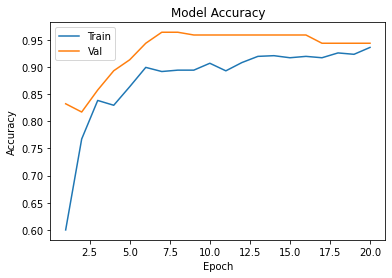

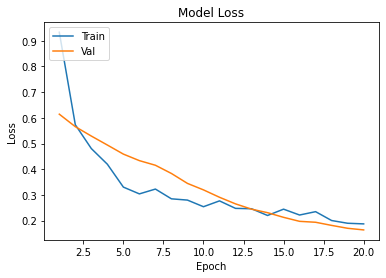

In [53]:
plot_learningcurve(history,epochs)

In [54]:
# adding Maxpoll

Epoch 1/50
25/25 [==============================] - 0s 12ms/step - loss: 1.1275 - accuracy: 0.5044 - val_loss: 0.6730 - val_accuracy: 0.4315
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7792 - accuracy: 0.6455 - val_loss: 0.6372 - val_accuracy: 0.7310
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.6811 - val_loss: 0.6056 - val_accuracy: 0.7665
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5899 - accuracy: 0.7535 - val_loss: 0.5784 - val_accuracy: 0.7411
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5573 - accuracy: 0.7700 - val_loss: 0.5501 - val_accuracy: 0.7462
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4433 - accuracy: 0.8030 - val_loss: 0.5205 - val_accuracy: 0.7614
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8170 - val_loss: 0.4901 - val_accuracy: 0.7817
Epoch 8/50
25/25 [=

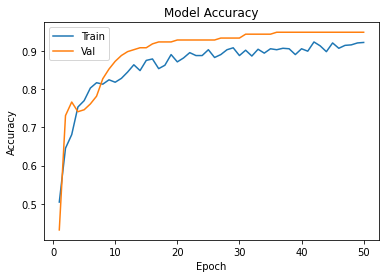

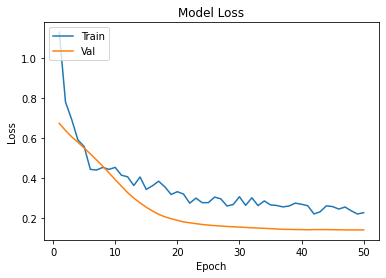

In [55]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)
plot_learningcurve(history,epochs)


In [59]:
y_pred = model.predict(X_test)

In [60]:
pred

array([[0.08505666],
       [0.05639836],
       [0.9999958 ],
       [0.02553371],
       [0.10356072],
       [0.9999999 ],
       [0.987666  ],
       [0.02116433],
       [0.04372793],
       [0.03170019],
       [0.08003619],
       [0.06523779],
       [0.9999988 ],
       [0.9998864 ],
       [0.08654046],
       [0.96581066],
       [0.01926288],
       [0.03900385],
       [1.        ],
       [0.9999999 ],
       [0.15489373],
       [0.03154638],
       [0.9999883 ],
       [0.12918055],
       [0.9944353 ],
       [0.05943468],
       [0.99861026],
       [0.9853235 ],
       [0.05444148],
       [0.02707559],
       [0.3533905 ],
       [0.03068706],
       [0.07835153],
       [0.0620099 ],
       [1.        ],
       [0.9998003 ],
       [0.99966097],
       [0.15987626],
       [0.9894713 ],
       [1.        ],
       [0.99998975],
       [0.03605032],
       [0.05275324],
       [1.        ],
       [0.0613074 ],
       [0.0579842 ],
       [0.99639606],
       [0.888

In [66]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9492


[0.14119595289230347, 0.9492385983467102]

In [67]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[106,   0],
       [ 10,  81]])

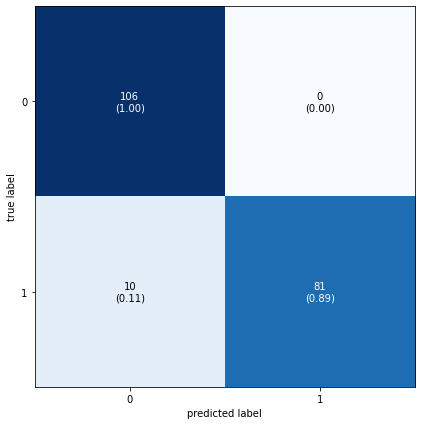

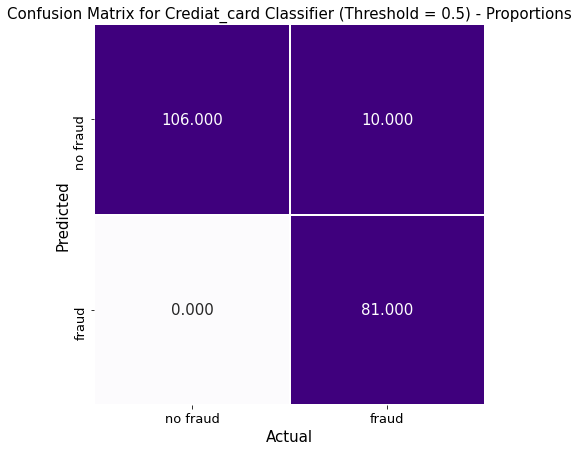

In [73]:
#Generating a Confusion matrix of proportions for logistic model
mat = confusion_matrix(y_test,y_pred)
df = pd.DataFrame(mat)
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=1, fmt='.3f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["no fraud","fraud"], yticklabels=["no fraud","fraud"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["no fraud","fraud"], fontsize=13)
ax.set_yticklabels(["no fraud","fraud"], fontsize=13)
plt.title("Confusion Matrix for Crediat_card Classifier (Threshold = 0.5) - Proportions", fontsize=15)
plt.savefig('CFresult.png')
plt.show()